In [1]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.pvsystem import PVSystem
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
location = Location(latitude=38.70755951894462, longitude=35.529753564832944, tz="Europe/Istanbul", altitude = 1050, name='Erciyes Üniversitesi')

In [3]:
location

Location: 
  name: Erciyes Üniversitesi
  latitude: 38.70755951894462
  longitude: 35.529753564832944
  altitude: 1050
  tz: Europe/Istanbul

In [4]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

In [5]:
module = sandia_modules['Canadian_Solar_CS6X_300M__2013_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_240__240V_']

In [6]:
temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [7]:
system = PVSystem(surface_tilt=30, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters)

In [8]:
modelchain = ModelChain(system,location)


In [9]:
times = pd.date_range(start="2022-01-01", end="2022-12-31", freq='1min', tz=location.tz)

In [10]:
clear_sky = location.get_clearsky(times)

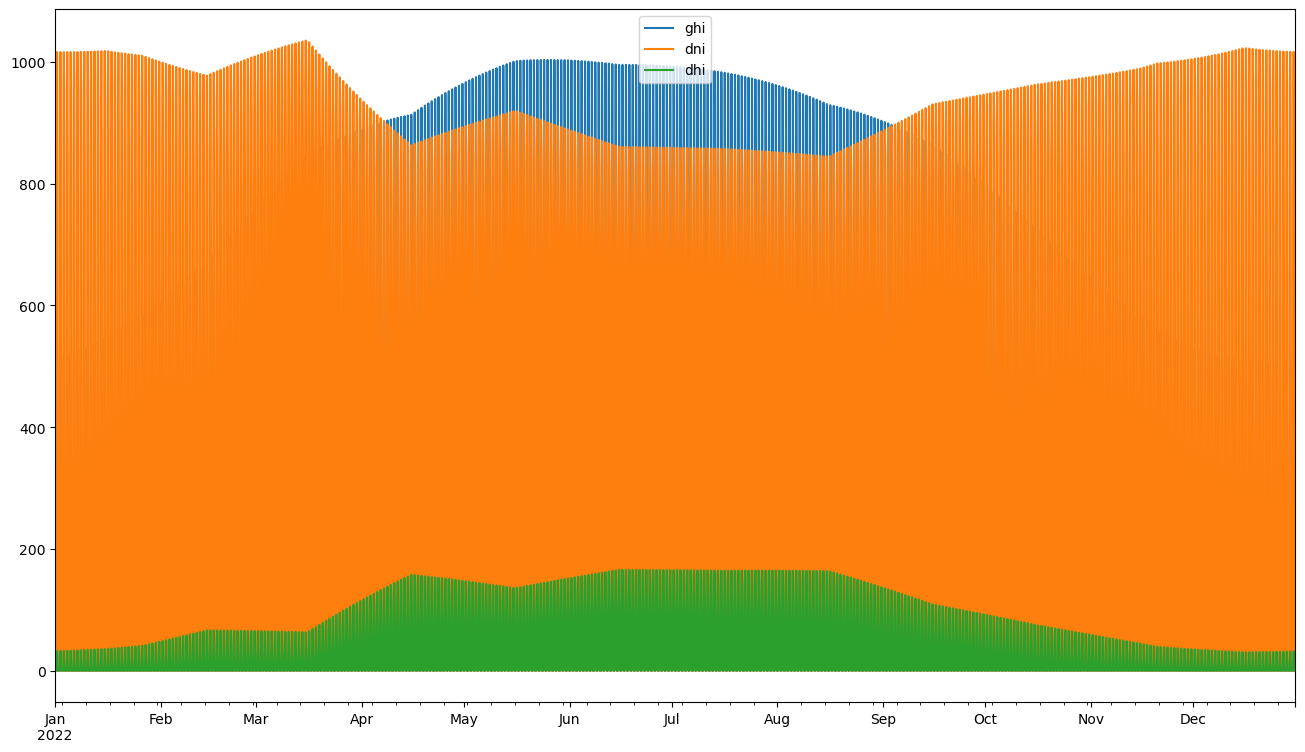

In [11]:
clear_sky.plot(figsize=(16,9))
plt.show()

ghi= Global Horizontal Irradiance
dni= Direct Normal Irradiance
dhi= Diffuse Horizontal Irradiance

<function matplotlib.pyplot.show(close=None, block=None)>

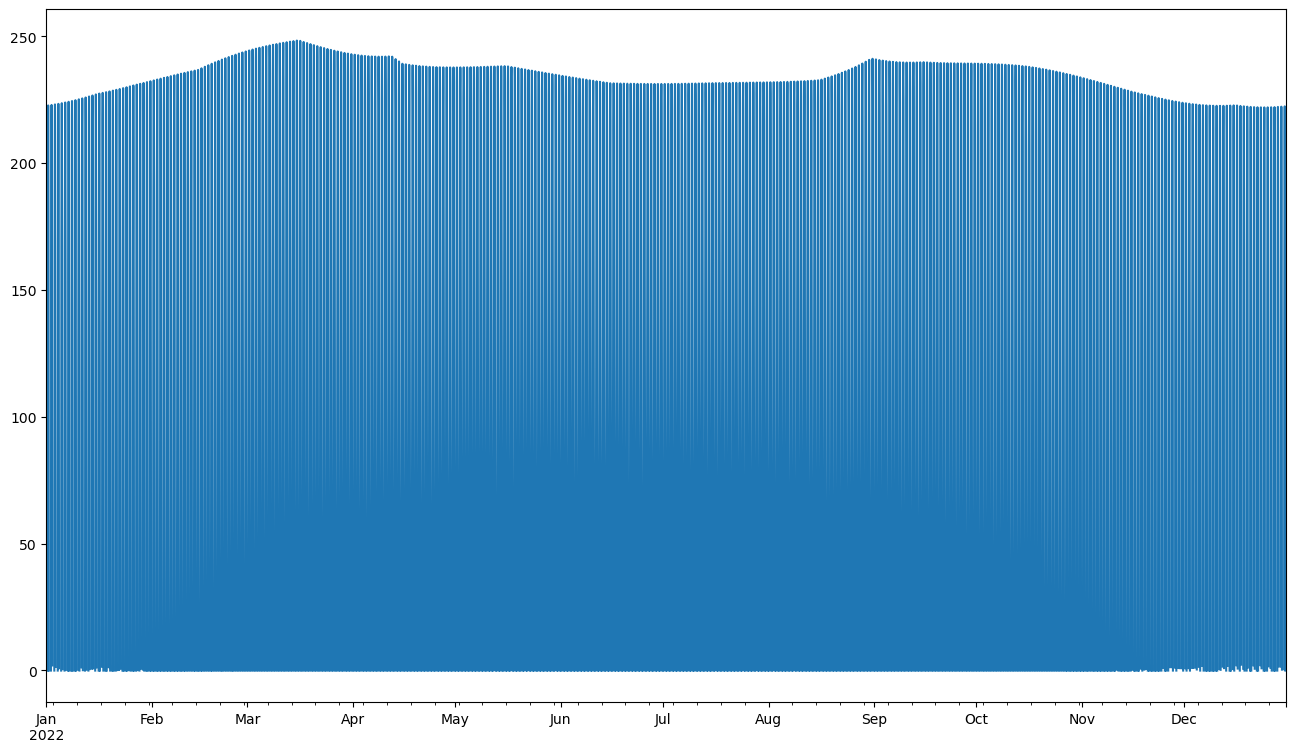

In [12]:
modelchain.run_model(clear_sky)
modelchain.results.ac.plot(figsize=(16,9))
plt.show